In [3]:
import numpy as np
import pandas as pd 
import os

In [4]:
# Set Kaggle API credentials
os.environ["KAGGLE_USERNAME"] = "himanshuvishwa0070"
os.environ["KAGGLE_KEY"] = "e23b004166236f4a5787539d80db6220"

# Download the dataset
! kaggle datasets download -d swatikhedekar/exploratory-data-analysis-on-netflix-data


  0%|          | 0.00/1.89M [00:00<?, ?B/s]
 53%|█████▎    | 1.00M/1.89M [00:01<00:01, 682kB/s]
100%|██████████| 1.89M/1.89M [00:01<00:00, 1.29MB/s]
100%|██████████| 1.89M/1.89M [00:01<00:00, 1.12MB/s]


In [5]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("exploratory-data-analysis-on-netflix-data.zip", compression="zip")

In [7]:
df.head()

show_id     type                  title         director   
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson  \
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country   
0                                                NaN  United States  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration   
0  September 25, 2021          2020  PG-13     90 min  \
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in   
0                                      Documentaries  \
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

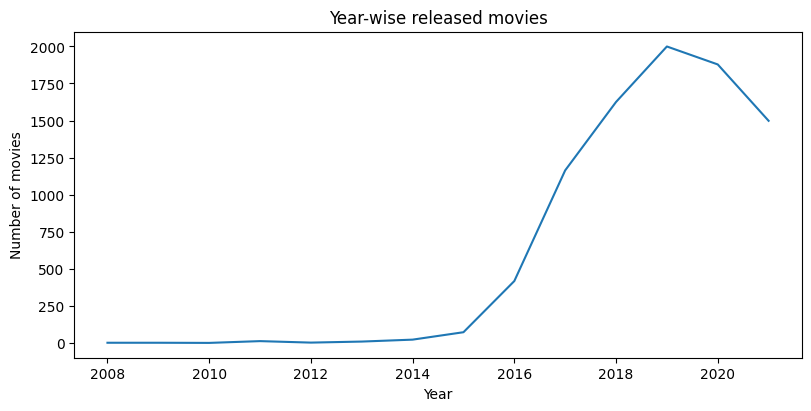

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['year'] = df.date_added.dt.year

year_wise = df.groupby('year')['title'].count()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4), layout='constrained')
year_wise.plot()
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Year-wise released movies')

plt.show()

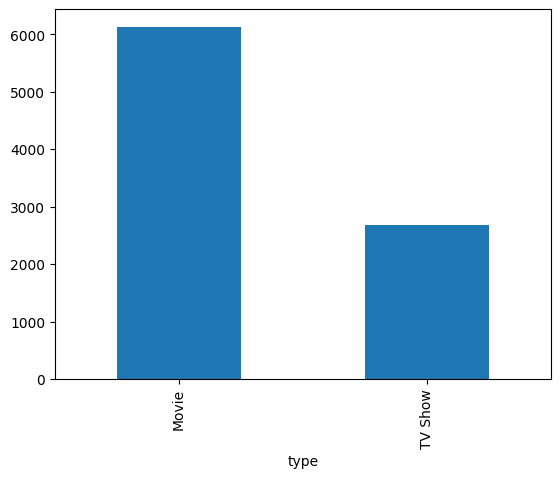

In [11]:
movie_type = df.groupby('type')['title'].count()

movie_type.plot(kind='bar')
plt.show()

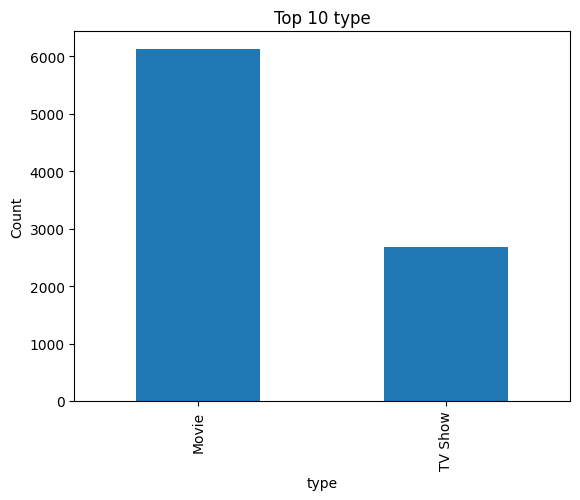

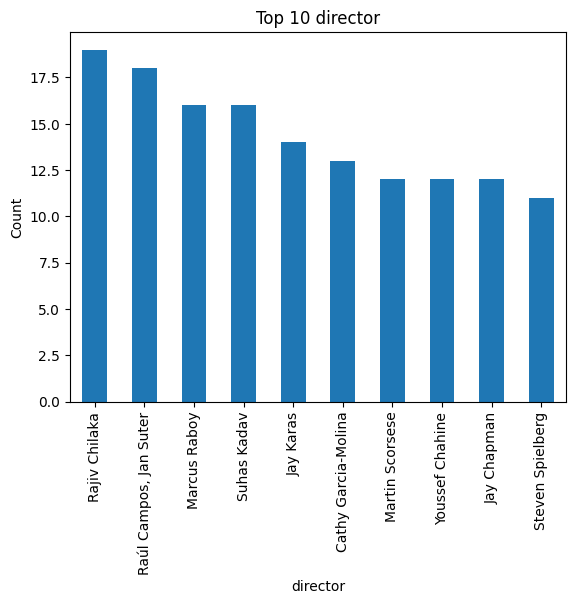

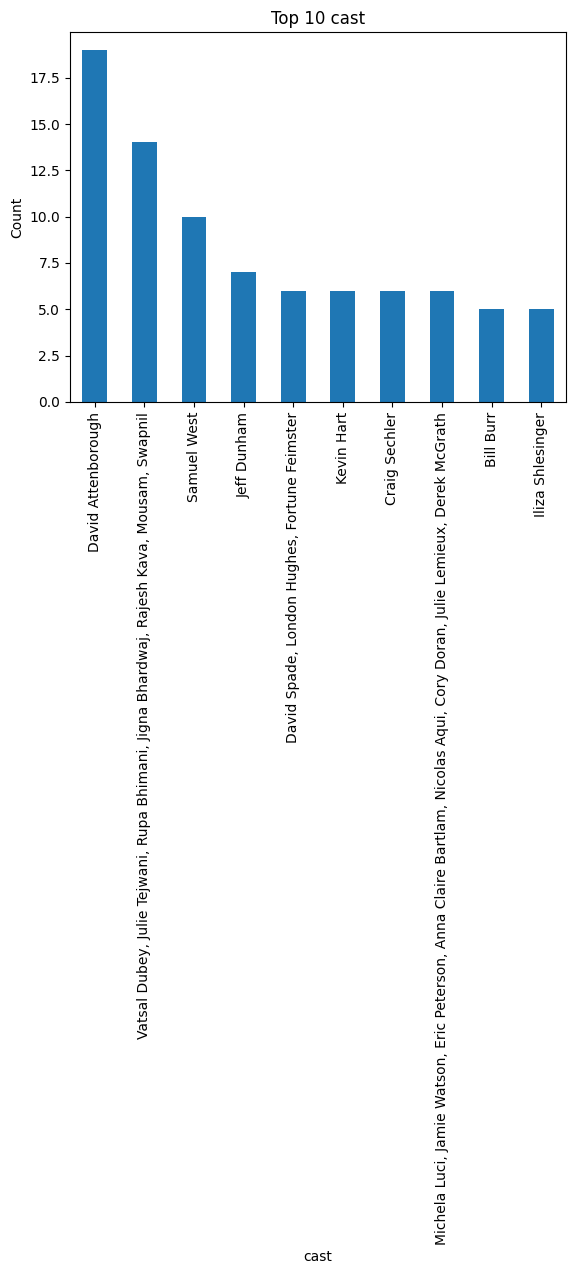

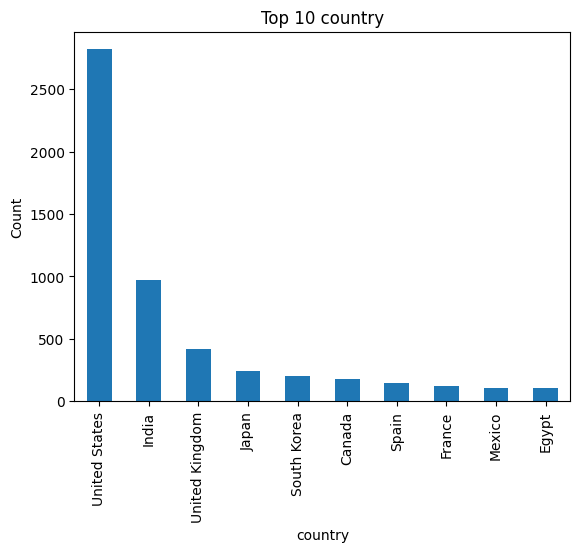

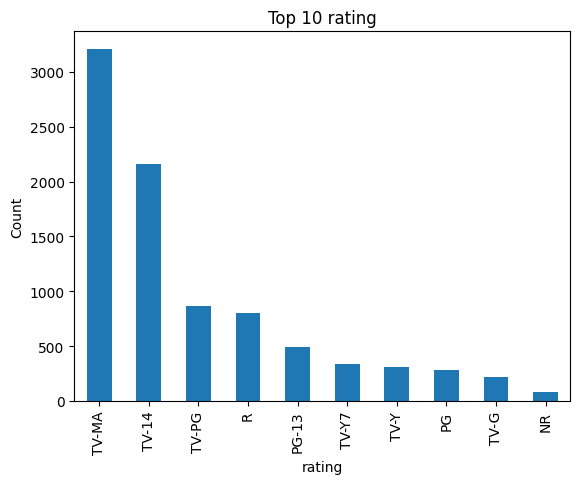

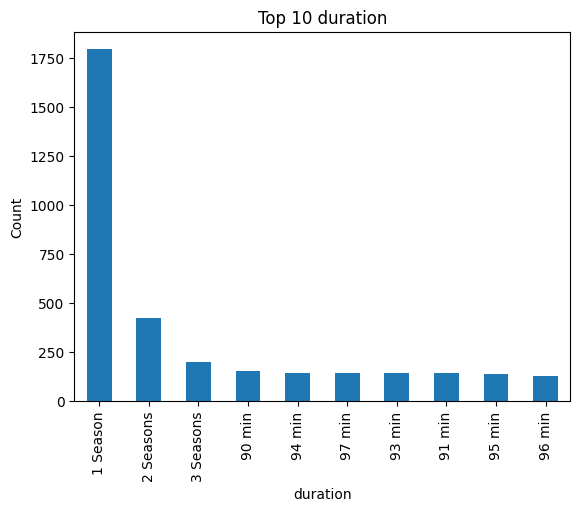

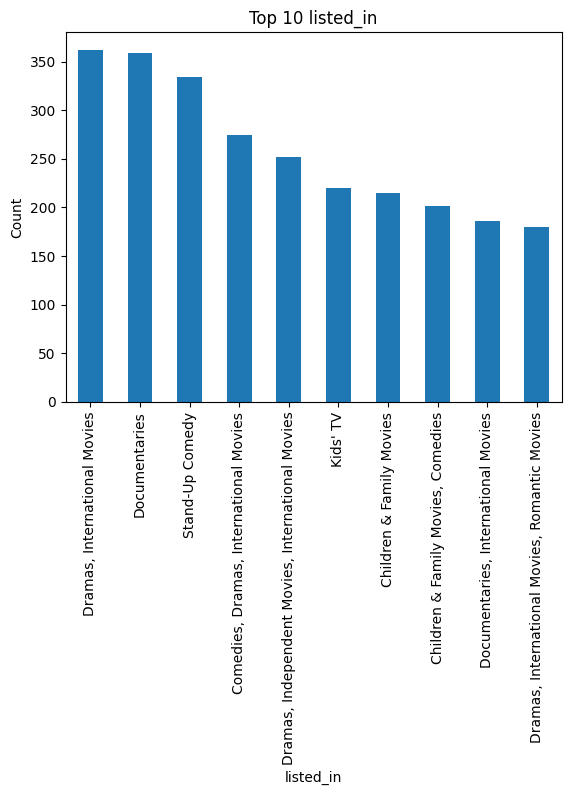

In [12]:
def top_10(df, col_name):
    if col_name not in df.columns:
        print(f"column '{col_name}' not found in the df.")
        return
    top_10_values = df[col_name].value_counts().nlargest(10)
    
    top_10_values.plot(kind='bar')
    plt.title(f"Top 10 {col_name}")
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.show()
    
graph_time = df[['type','director','cast','country','rating','duration','listed_in']]
    
for col_name in graph_time.columns:
    if pd.api.types.is_object_dtype(df[col_name]):
        top_10(graph_time, col_name)

In [15]:
from ydata_profiling import ProfileReport

data=df
profile = ProfileReport(data, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]